In [76]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


torch.Size([1, 224, 224])
tensor(0.3661) tensor(0.9497)


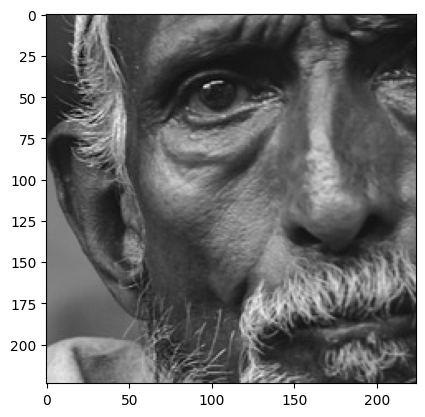

In [8]:
from data import get_img_transforms_train, get_img_transforms_train_target, BigImagesDataset,  get_img_transforms_test, get_img_transforms_test_target, BigImagesDataModule
import config.config as config
import matplotlib.pyplot as plt
from utils import convert_rgb_tensor_for_plot, convert_gray_tensor_for_plot


train_transforms = get_img_transforms_train(224)
train_target_transforms = get_img_transforms_train_target(224)
ds_train = BigImagesDataset(str(config.TRAINING_IMGS_DIR), train_transforms, train_target_transforms)

in_img, target, label = ds_train[100]
plt.imshow(convert_gray_tensor_for_plot(in_img.unsqueeze(0)).squeeze(0).squeeze(0), cmap="gray")
print(ds_train[0][0].shape)
print(target.min(), target.max())

TypeError: Invalid shape (1, 224, 224) for image data

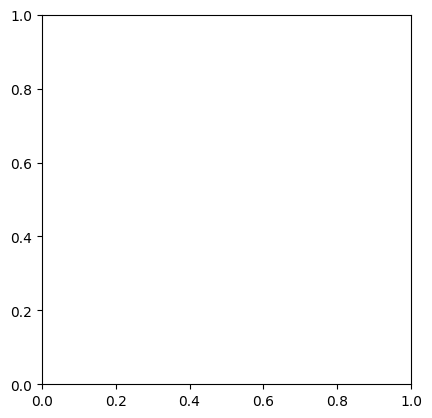

In [9]:
plt.imshow(convert_rgb_tensor_for_plot(target.unsqueeze(0)).squeeze(0), cmap="gray")
print(target, target.min(), target.max())


In [22]:
module = BigImagesDataModule(str(config.TRAINING_IMGS_DIR), 224, 448, 2, 1)
module.setup(stage="test")
dataloader_test = module.test_dataloader()
print(len(dataloader_test))
for batch in dataloader_test:
    img, target, label = batch
    print(img.shape, target.shape, label.shape, sep="\n")
    break


140


torch.Size([2, 3, 448, 448])
torch.Size([2, 1, 448, 448])
torch.Size([2])


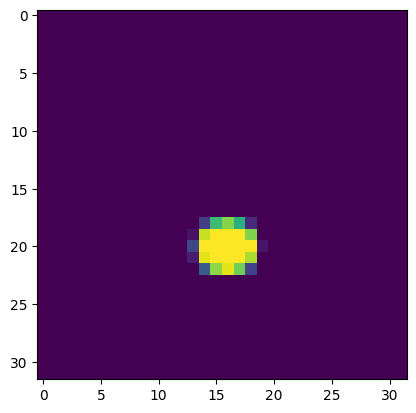

In [1]:
from utils import load_transp_conv_weights
import config.config as config
import matplotlib.pyplot as plt
# print(load_transp_conv_weights(str(config.FONT_PATH), 34, config.TYPEWRITER_CONFIG["letterList"])[0][0])
convs = load_transp_conv_weights(str(config.FONT_PATH), 32, config.TYPEWRITER_CONFIG["letterList"])
plt.imshow(convs[0][0].numpy())


In [2]:
from models import NeuralNetwork
import config.config as config
import matplotlib.pyplot as plt

net = NeuralNetwork(str(config.FONT_PATH), 32, round(32*0.035), 5, config.TYPEWRITER_CONFIG["letterList"])



/home/peter/repositories/Typewriter/Image2Letter/.venv/lib64/python3.11/site-packages/pydantic/_internal/_fields.py:127: UserWarning: Field "model_server_url" has conflict with protected namespace "model_".

You may be able to resolve this warning by setting `model_config['protected_namespaces'] = ()`.
  warnings.warn(
/home/peter/repositories/Typewriter/Image2Letter/.venv/lib64/python3.11/site-packages/pydantic/_internal/_config.py:269: UserWarning: Valid config keys have changed in V2:
* 'schema_extra' has been renamed to 'json_schema_extra'
  warnings.warn(message, UserWarning)


ImportError: cannot import name 'NeuralNetwork' from 'models' (/home/peter/repositories/Typewriter/Image2Letter/image2letterAI/models.py)

torch.Size([1, 1, 224, 224])
torch.Size([1, 100, 112, 112])
tensor([[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         ...,
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.6417],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         ...,
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

        [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]

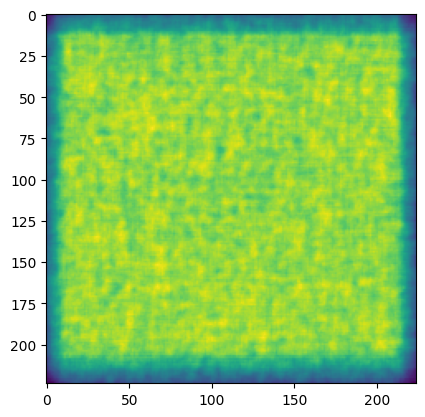

In [2]:
import torch

test_input = torch.randn(1, 3, 224, 224)
output, type_hits = net(test_input)
plt.imshow(output.detach().numpy()[0][0])
print(output.shape)
print(type_hits.shape)
print(type_hits[0][:])

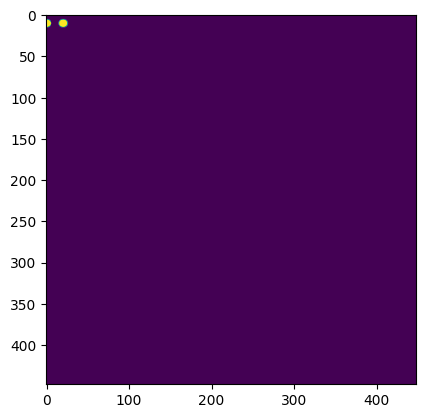

In [3]:
input_tensor = torch.zeros(1, 100, 224, 224)
input_tensor[0][0][0][0] = 0.5
input_tensor[0][0][0][10] = 0.5

output_transp = net.transp_conv(input_tensor)
plt.imshow(output_transp.detach().numpy()[0][0])

In [1]:
from utils import TypeRLoss
from train import TypeRNet
import config.config as configFile
import matplotlib.pyplot as plt
import torch
import datetime
from data import get_img_transforms_train, get_img_transforms_train_target, BigImagesDataset,  get_img_transforms_test, get_img_transforms_test_target, BigImagesDataModule
from utils import convert_rgb_tensor_for_plot, convert_gray_tensor_for_plot


config = {
    "experiment_name": "simple Net "+ str(datetime.datetime.now()),
    "tracking_uri": "/content/drive/MyDrive/mlflow-runs",

    "lr" : 1e-4,
    "alpha" : 1.,
    "beta" : 0.,
    "gamma" : 0.,

    "sched_step_size" : 8,
    "sched_gamma" : 0.1,

    "img_dir" : str(configFile.TRAINING_IMGS_DIR),
    "img_size" : 224,
    "img_size_test": 448,
    "batch_size": 1,
    "val_ratio" : 0.2,
    "test_ratio" : 0.2,
    "num_epochs": 5,
    "precision": 32,

    "font_path": str(configFile.FONT_PATH),
    "transposed_kernel_size" : 31,
    "transposed_stride": 1,
    "transposed_padding": 15,
    "max_letter_per_pix": 5,
    "letters": configFile.TYPEWRITER_CONFIG["letterList"],
    "eps_out": 1./100,
    }

net = TypeRNet(config=config)
test_batch = torch.randn((2, 1, 224, 224)), torch.rand((2, 1, 224,224)), torch.tensor([0,1])
train_transforms = get_img_transforms_train(config["img_size"])
train_target_transforms = get_img_transforms_train_target(config["img_size"])
ds_train = BigImagesDataset(str(configFile.TRAINING_IMGS_DIR), train_transforms, train_target_transforms)

in_img, target, label = ds_train[100]
loss = net.training_step(test_batch, 0)

out_img, key_strokes = net.forward(in_img.unsqueeze(0))
print(loss)

/home/peter/repositories/Typewriter/Image2Letter/.venv/lib64/python3.11/site-packages/pydantic/_internal/_fields.py:127: UserWarning: Field "model_server_url" has conflict with protected namespace "model_".

You may be able to resolve this warning by setting `model_config['protected_namespaces'] = ()`.
  warnings.warn(
/home/peter/repositories/Typewriter/Image2Letter/.venv/lib64/python3.11/site-packages/pydantic/_internal/_config.py:269: UserWarning: Valid config keys have changed in V2:
* 'schema_extra' has been renamed to 'json_schema_extra'
  warnings.warn(message, UserWarning)
/home/peter/repositories/Typewriter/Image2Letter/.venv/lib64/python3.11/site-packages/torchvision/datapoints/__init__.py:12: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feedback you may have in this issue: https://github.com/pytorch/vision

tensor(2.0268, grad_fn=<MulBackward0>)


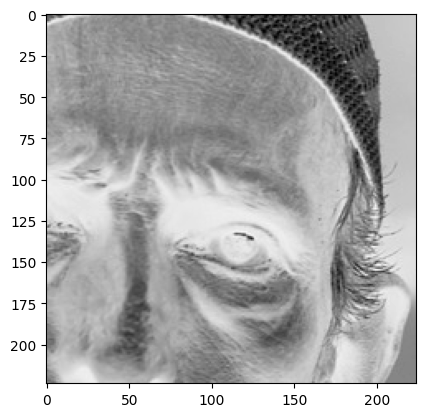

In [2]:
plt.imshow(convert_gray_tensor_for_plot(in_img.unsqueeze(0)).squeeze(0).squeeze(0), cmap="gray")

torch.Size([1, 1, 224, 224]) tensor(0.1519, grad_fn=<MinBackward1>) tensor(5.1587, grad_fn=<MaxBackward1>)


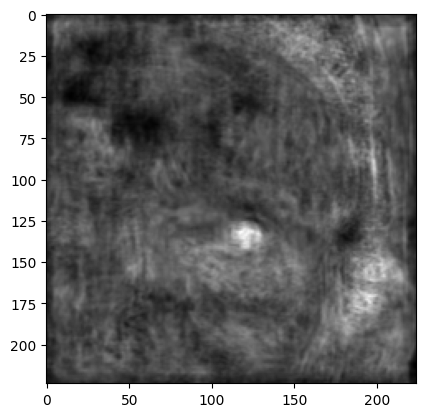

In [3]:
print(out_img.shape, out_img.min(), out_img.max())
plt.imshow(convert_gray_tensor_for_plot(out_img.detach().cpu()).squeeze(0).squeeze(0), cmap="gray")

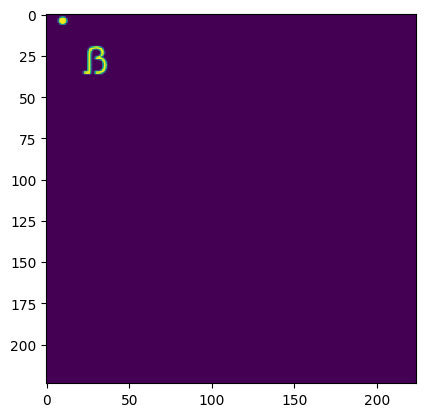

In [4]:
input_tensor = torch.zeros(1, 100, 224, 224)
input_tensor[0][58][30][30] = 0.5
input_tensor[0][0][0][10] = 0.5

output_transp = net.transp_conv(input_tensor)
plt.imshow(output_transp.detach().numpy()[0][0])

In [17]:
from utils import calc_receptive_field

calc_receptive_field([(7, 2, 3), (15,  1, 7), (15,  1, 7)])

63

In [2]:
import torchvision.models as models
models.resnet18(weights=models.ResNet18_Weights.DEFAULT)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [23]:
from train import tune_typeR

tune_typeR(1, 0)

(pid=21171) /home/peter/repositories/Typewriter/Image2Letter/.venv/lib64/python3.11/site-packages/pydantic/_internal/_fields.py:127: UserWarning: Field "model_server_url" has conflict with protected namespace "model_".
(pid=21171) 
(pid=21171) You may be able to resolve this warning by setting `model_config['protected_namespaces'] = ()`.
(pid=21171)   warnings.warn(
(pid=21171) /home/peter/repositories/Typewriter/Image2Letter/.venv/lib64/python3.11/site-packages/pydantic/_internal/_config.py:269: UserWarning: Valid config keys have changed in V2:
(pid=21171) * 'schema_extra' has been renamed to 'json_schema_extra'
(pid=21171)   warnings.warn(message, UserWarning)
(pid=21171) /home/peter/repositories/Typewriter/Image2Letter/.venv/lib64/python3.11/site-packages/torchvision/datapoints/__init__.py:12: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user fe

Sanity Checking: 0it [00:00, ?it/s]m 
Sanity Checking DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]


(train_typeR pid=21171) 2023/09/18 13:23:57 WARNING mlflow.tracking.client: Out-of-range values are detected. Clipping array (dtype: 'float32') to [0, 1]


Sanity Checking DataLoader 0:  50%|█████     | 1/2 [00:00<00:00,  2.19it/s]


(train_typeR pid=21171) /home/peter/repositories/Typewriter/Image2Letter/.venv/lib64/python3.11/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:442: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 8 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
(train_typeR pid=21171)   rank_zero_warn(


Epoch 0:   0%|          | 0/841 [00:00<?, ?it/s]                           


In [4]:
from utils import get_rel_area_letters
import config.config as config
# print(load_transp_conv_weights(str(config.FONT_PATH), 34, config.TYPEWRITER_CONFIG["letterList"])[0][0])
rel_areas = get_rel_area_letters(str(config.FONT_PATH), config.TYPEWRITER_CONFIG["letterList"])
for index, value in enumerate(rel_areas):
    if(index % 10 == 0):
        print("\n")
    print(round(value, 2), ", ", sep="", end="")



1.61, 4.41, 8.74, 4.4, 5.24, 1.47, 3.58, 3.2, 6.46, 5.91, 

4.79, 7.82, 8.86, 6.53, 8.95, 8.85, 7.44, 9.08, 8.59, 7.77, 

8.07, 5.52, 7.54, 8.54, 7.29, 6.45, 8.5, 7.17, 6.6, 8.73, 

7.87, 7.64, 7.17, 9.36, 7.14, 8.2, 9.4, 8.61, 3.66, 3.71, 

2.76, 8.73, 7.34, 4.33, 6.28, 6.63, 3.52, 4.21, 4.21, 1.0, 

3.69, 3.45, 3.23, 7.38, 3.54, 2.6, 7.1, 5.63, 7.88, 6.6, 

7.73, 5.58, 8.21, 7.18, 8.64, 8.68, 7.21, 6.79, 6.91, 4.9, 

6.41, 7.23, 6.08, 5.01, 5.29, 5.47, 6.02, 6.43, 8.11, 7.93, 

6.55, 8.55, 5.98, 7.16, 8.23, 7.41, 2.29, 4.71, 6.4, 5.91, 

6.49, 6.88, 6.53, 7.13, 4.46, 7.9, 7.14, 1.0, 4.06, 6.6, 